In [1]:
#House Price Prediction using Machine Learning in Python
'''
House price prediction is a problem in the real estate industry to make informed decisions. 
By using machine learning algorithms we can predict the price of a house based on various 
features such as location, size, number of bedrooms and other relevant factors. 
In this article we will explore how to build a machine learning model in Python to predict 
house prices to gain valuable insights into the housing market.
'''
#To tackle this issue we will build a machine learning model trained on the House Price Prediction Dataset. 
#the dataset includes 13 features:

#Id	To count the records.
#MSSubClass	 Identifies the type of dwelling involved in the sale.
#MSZoning	Identifies the general zoning classification of the sale.
#LotArea	 Lot size in square feet.
#LotConfig	Configuration of the lot
#BldgType	Type of dwelling
#OverallCond	Rates the overall condition of the house
#YearBuilt	Original construction year
#YearRemodAdd	Remodel date (same as construction date if no remodeling or additions).
#Exterior1st	Exterior covering on house
#BsmtFinSF2	Type 2 finished square feet.
#TotalBsmtSF	Total square feet of basement area
#SalePrice	To be predicted

'\nHouse price prediction is a problem in the real estate industry to make informed decisions. \nBy using machine learning algorithms we can predict the price of a house based on various \nfeatures such as location, size, number of bedrooms and other relevant factors. \nIn this article we will explore how to build a machine learning model in Python to predict \nhouse prices to gain valuable insights into the housing market.\n'

In [2]:
#import librabries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("HousePricePrediction.xlsx")

print(data.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [3]:
data.shape

(2919, 13)

In [4]:
#Data Preprocessing
#Now, we categorize the features depending on their datatype (int, float, object) 

obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 3


<Axes: >

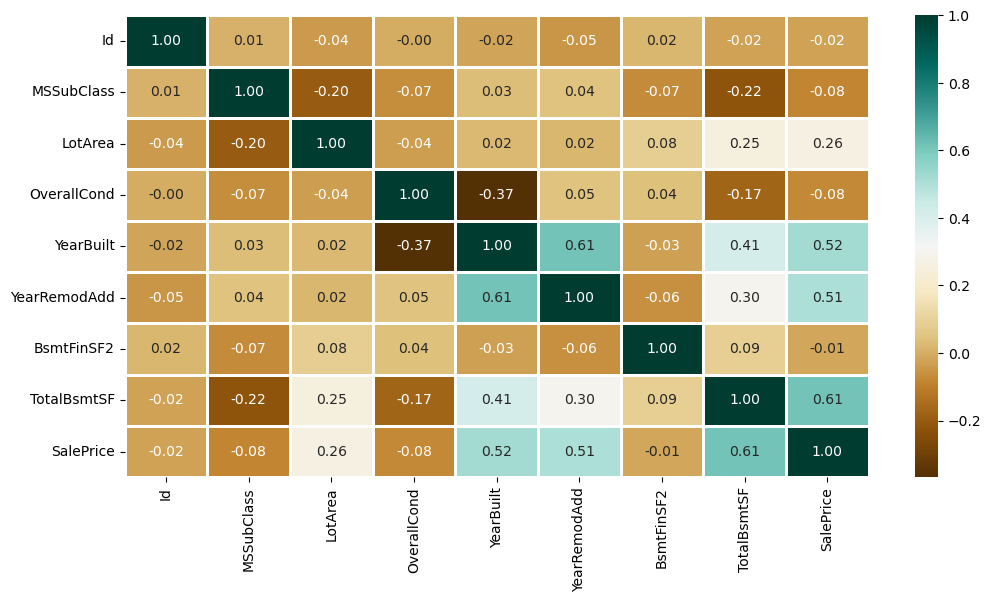

In [5]:
#Exploratory Data Analysis
numerical_dataset = data.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

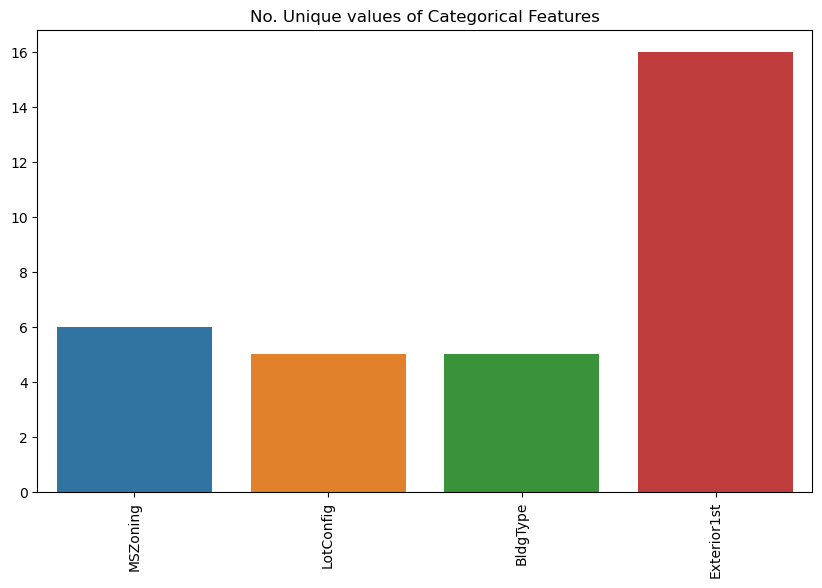

In [6]:
unique_values = []
for col in object_cols:
  unique_values.append(data[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

C:\Users\rkkro\AppData\Local\Temp\ipykernel_9808\3655259824.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


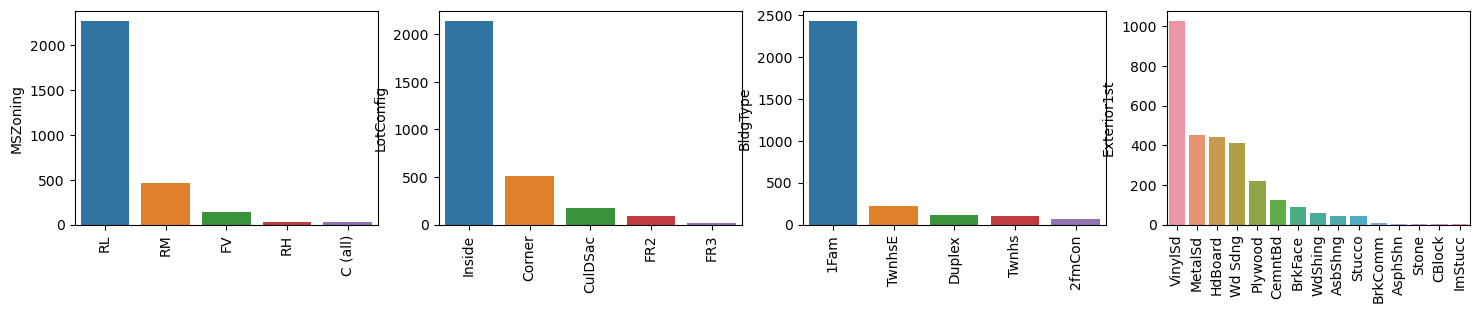

In [7]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = data[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

Data Cleaning

In [8]:
#As Id Column will not be participating in any prediction. .
#So we can Drop it.
data.drop(['Id'],
             axis=1,
             inplace=True)

#Replacing SalePrice empty values with their mean values to make the data distribution symmetric.
data['SalePrice'] = data['SalePrice'].fillna(
  data['SalePrice'].mean())

In [9]:

#Drop records with null values (as the empty records are very less).
new_dataset = data.dropna()
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

OneHotEncoder - For Label categorical features

In [10]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [11]:
#Then once we have a list of all the features. 
#We can apply OneHotEncoding to the whole list.
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

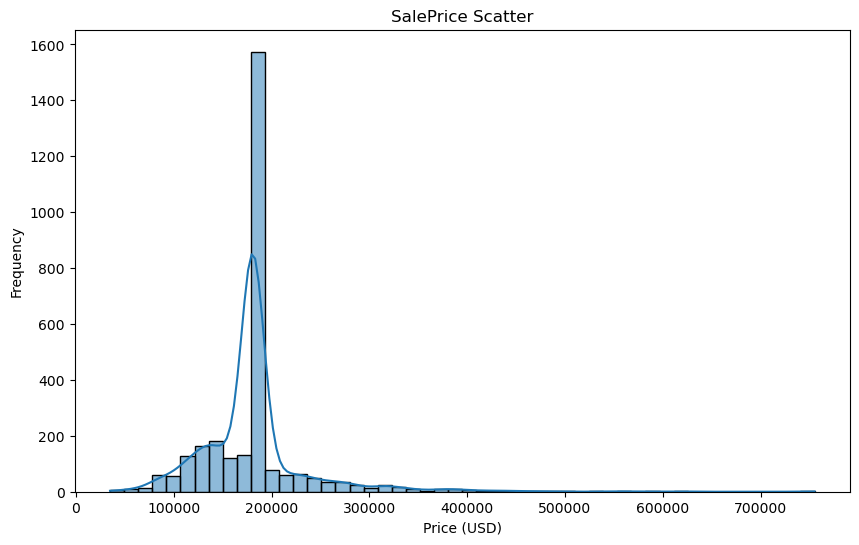

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df_final['SalePrice'], kde=True, bins=50)
plt.title('SalePrice Scatter')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

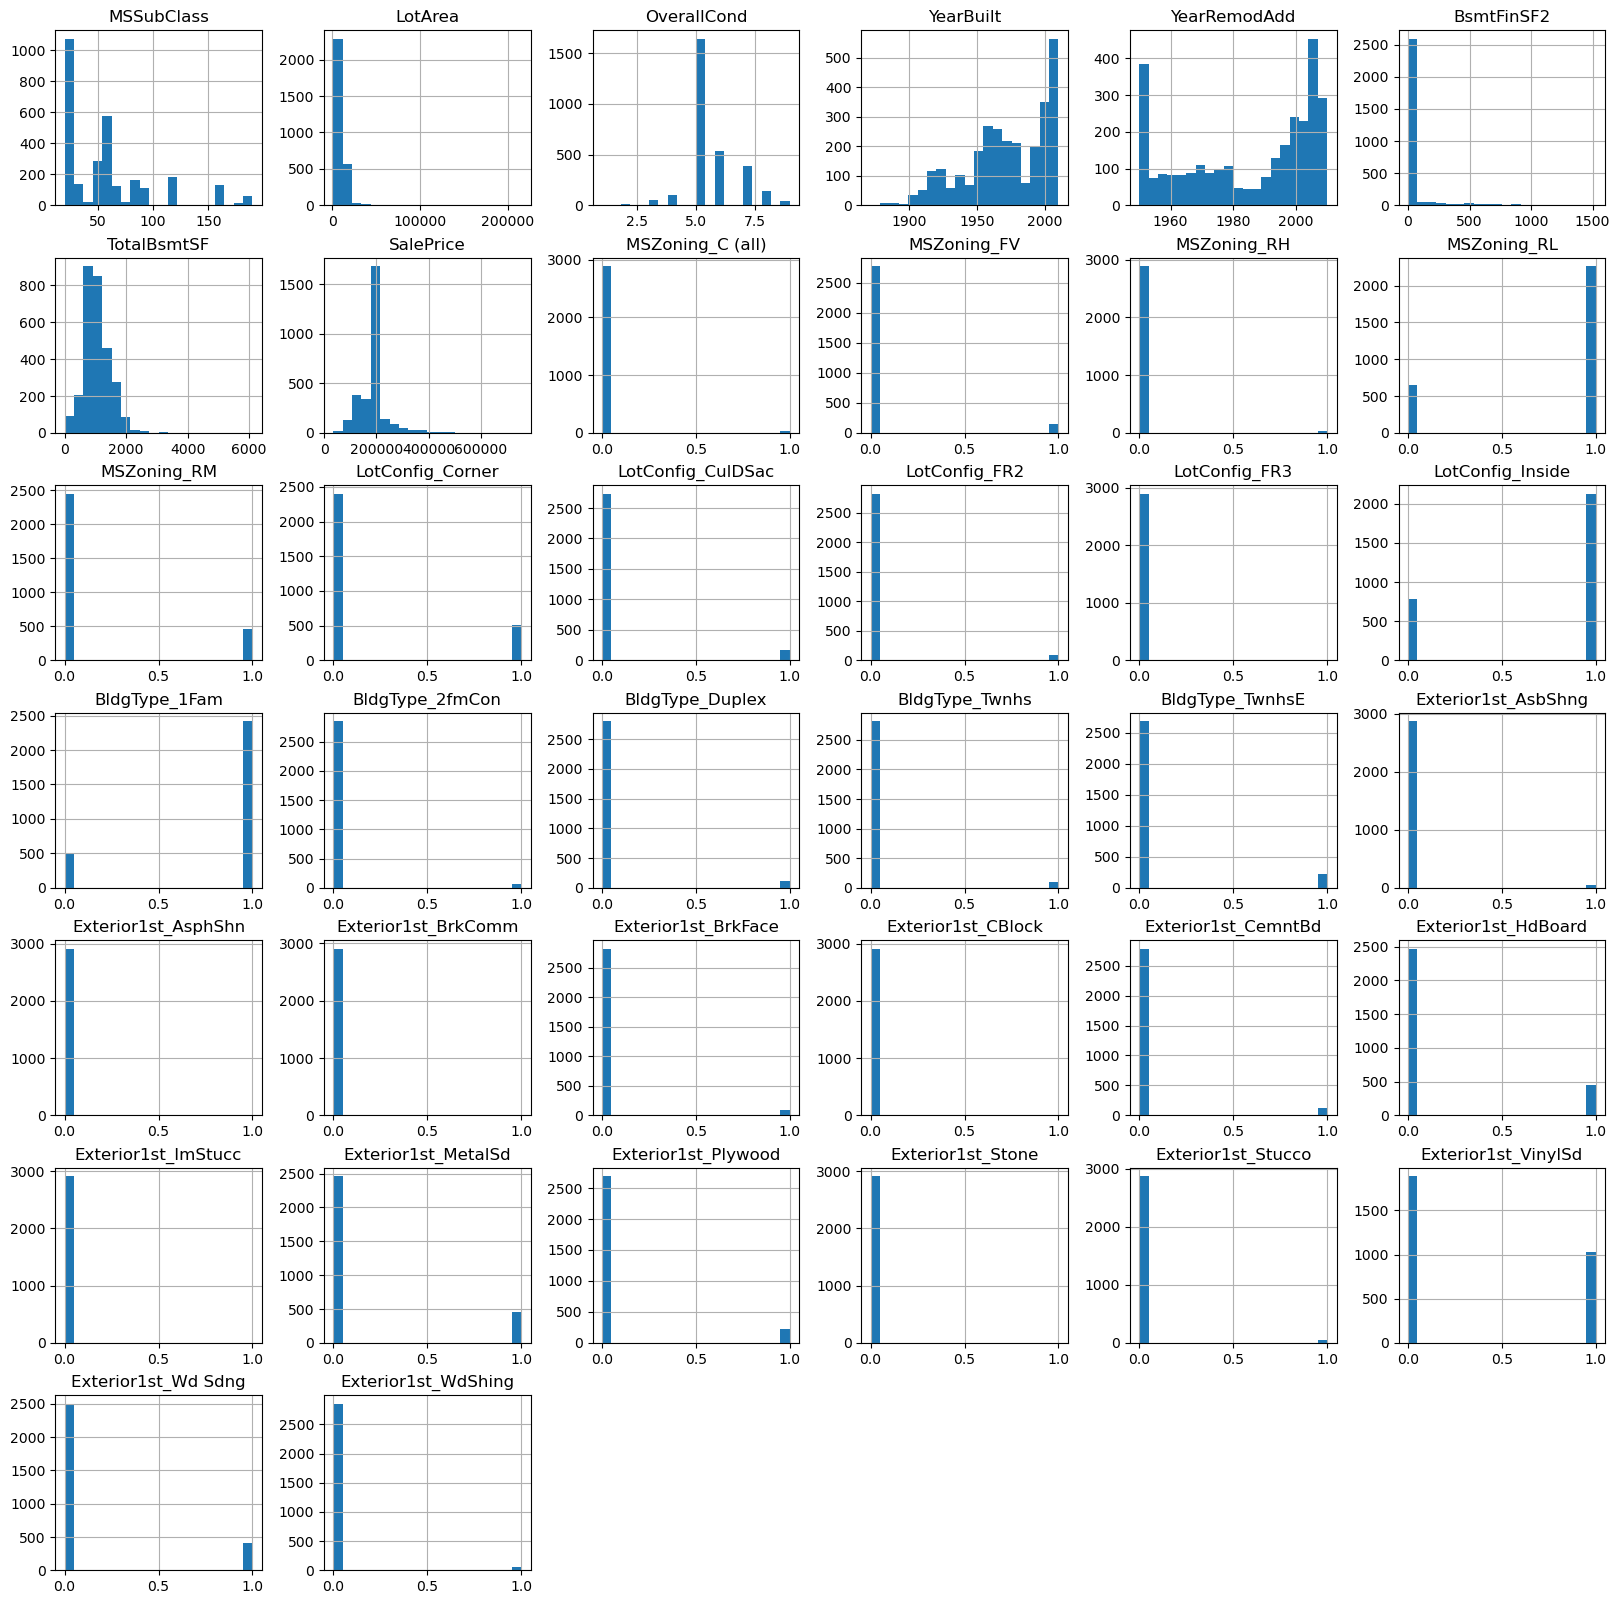

In [13]:
df_final.hist(figsize=[20,20], bins = 20)
plt.show()

Splitting Dataset into Training and Testing

In [14]:
# X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

Model Training and Accuracy

In [15]:
#First model
#Linear Regressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.18741683841599951


Linear Regression

Linear Regression Evaluation Metrics:
 RMSE : 41138.56
 MAE  : 30829.94
 R²   : 0.3741
 MAPE : 18.74%


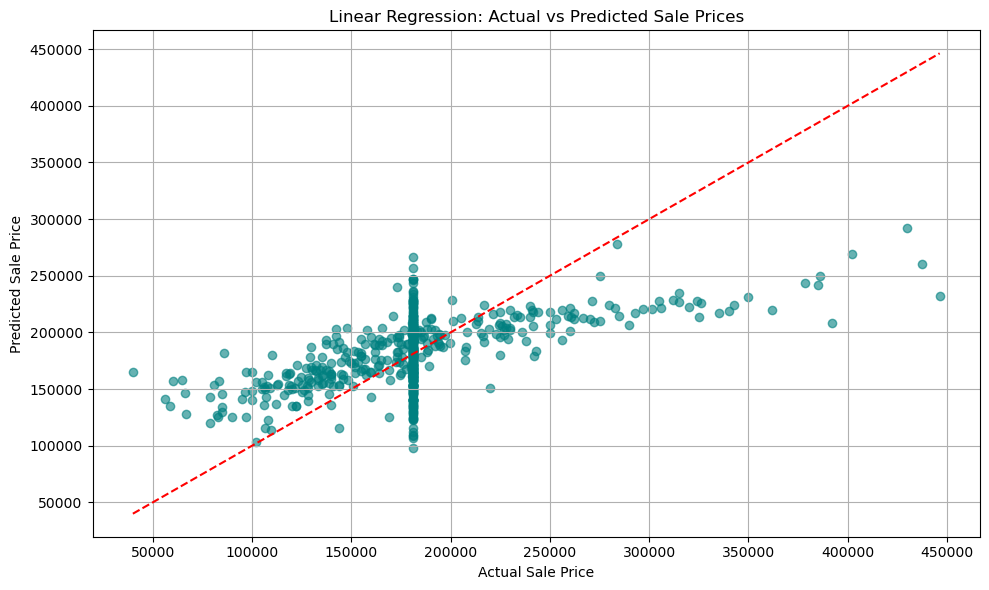

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Compute all metrics
rmse = np.sqrt(mean_squared_error(Y_valid, Y_pred))
mae = mean_absolute_error(Y_valid, Y_pred)
r2 = r2_score(Y_valid, Y_pred)
mape = mean_absolute_percentage_error(Y_valid, Y_pred) * 100

print("Linear Regression Evaluation Metrics:")
print(f" RMSE : {rmse:.2f}")
print(f" MAE  : {mae:.2f}")
print(f" R²   : {r2:.4f}")
print(f" MAPE : {mape:.2f}%")

#  Visualizing Actual vs Predicted Prices
plt.figure(figsize=(10,6))
plt.scatter(Y_valid, Y_pred, alpha=0.6, color='teal')
plt.plot([Y_valid.min(), Y_valid.max()], [Y_valid.min(), Y_valid.max()], 'r--')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Linear Regression: Actual vs Predicted Sale Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
# -----------------------------------------------
# Why Apply Log Transformation to SalePrice?
# -----------------------------------------------

# What is Skewness?
# Skewness is a statistical measure of the asymmetry of the distribution of values.
# - A skewness of 0 indicates a perfectly symmetrical distribution (ideal for linear regression).
# - A positive skew (right-skewed) means long tail on the right (common in housing prices).
# - A negative skew (left-skewed) means long tail on the left.

# Why Does It Matter?
# Linear regression assumes that:
# - The target variable (SalePrice) is normally distributed.
# - The residuals (errors) follow a normal distribution.

# Problem:
# In housing data, SalePrice usually has a strong right skew.
# This violates regression assumptions and can lead to poor predictive performance.

# Solution:
# We apply a log transformation using np.log1p(SalePrice) to:
# - Reduce skewness and bring distribution closer to normal.
# - Improve model accuracy (especially for linear models).
# - Stabilize variance and reduce the influence of extreme outliers.

# Result:
# A more normal-like distribution of SalePrice improves regression fitting and residual diagnostics.


Original SalePrice skewness: 2.66
Log-Transformed SalePrice skewness: -0.25

Linear Regression Evaluation Metrics (After Log Transform):
 RMSE : 41103.61
 MAE  : 29948.47
 R²   : 0.3752
 MAPE : 17.72%


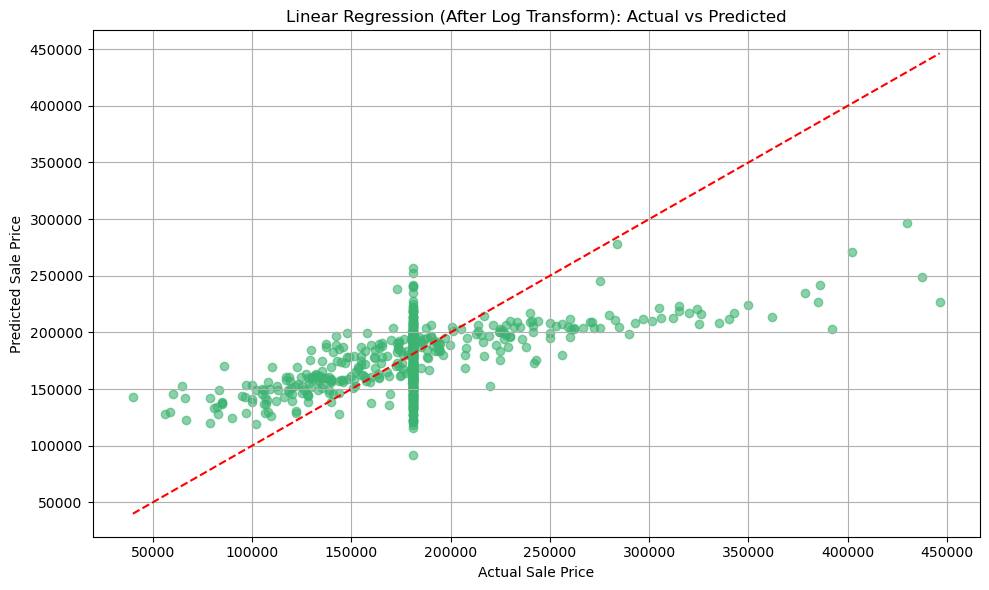

In [18]:
import scipy.stats as stats

# Check original skewness
original_skew = df_final['SalePrice'].skew()
print(f"Original SalePrice skewness: {original_skew:.2f}")

# Apply log transformation
df_final['SalePrice'] = np.log1p(df_final['SalePrice'])

# Check skewness after transformation
log_skew = df_final['SalePrice'].skew()
print(f"Log-Transformed SalePrice skewness: {log_skew:.2f}")

# Split again with transformed Y
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

# Retrain Linear Regression on log-transformed SalePrice
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred_log = model_LR.predict(X_valid)

# Inverse log1p to get predicted and actual SalePrice
Y_valid_actual = np.expm1(Y_valid)
Y_pred_actual = np.expm1(Y_pred_log)

# Evaluate model on original price scale
rmse = np.sqrt(mean_squared_error(Y_valid_actual, Y_pred_actual))
mae = mean_absolute_error(Y_valid_actual, Y_pred_actual)
r2 = r2_score(Y_valid_actual, Y_pred_actual)
mape = mean_absolute_percentage_error(Y_valid_actual, Y_pred_actual) * 100

print("\nLinear Regression Evaluation Metrics (After Log Transform):")
print(f" RMSE : {rmse:.2f}")
print(f" MAE  : {mae:.2f}")
print(f" R²   : {r2:.4f}")
print(f" MAPE : {mape:.2f}%")

#  Plot Actual vs Predicted Prices (after log transform)
plt.figure(figsize=(10,6))
plt.scatter(Y_valid_actual, Y_pred_actual, alpha=0.6, color='mediumseagreen')
plt.plot([Y_valid_actual.min(), Y_valid_actual.max()], 
         [Y_valid_actual.min(), Y_valid_actual.max()], 'r--')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Linear Regression (After Log Transform): Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
#Required Librabries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


Lasso Regression (with Scaling)

Lasso Regression Evaluation Metrics (Log-Transformed + Scaled):
 RMSE : 41134.76
 MAE  : 29876.59
 R²   : 0.3743
 MAPE : 17.70%


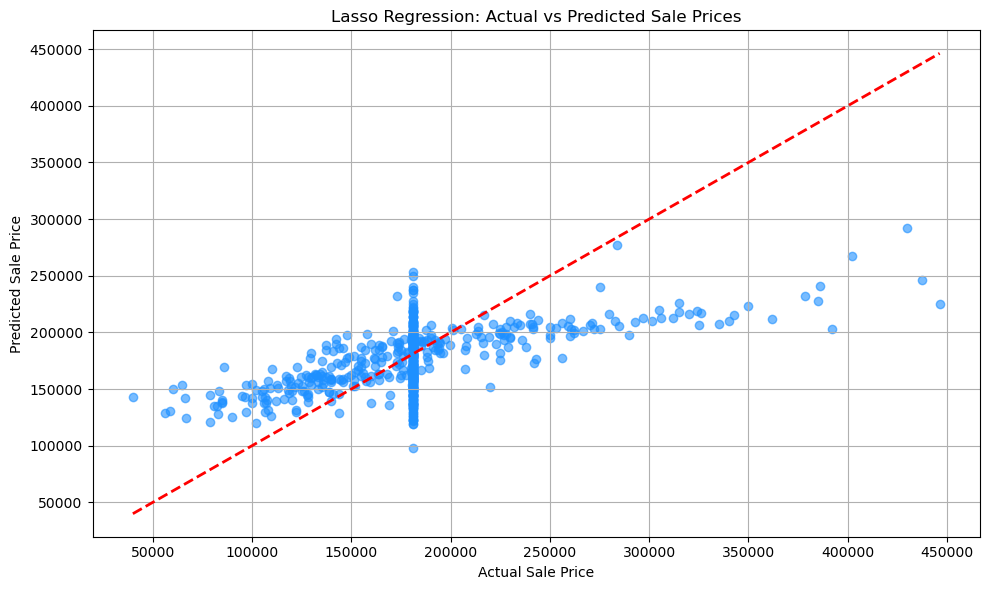

In [21]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline

# Lasso benefits from scaling
model_lasso = make_pipeline(
    StandardScaler(),
    Lasso(alpha=0.001, max_iter=10000)
)
model_lasso.fit(X_train, Y_train)
Y_pred_log_lasso = model_lasso.predict(X_valid)

# Reverse log transformation
Y_valid_actual = np.expm1(Y_valid)
Y_pred_actual = np.expm1(Y_pred_log_lasso)

# Metrics
rmse = np.sqrt(mean_squared_error(Y_valid_actual, Y_pred_actual))
mae = mean_absolute_error(Y_valid_actual, Y_pred_actual)
r2 = r2_score(Y_valid_actual, Y_pred_actual)
mape = mean_absolute_percentage_error(Y_valid_actual, Y_pred_actual) * 100

print("Lasso Regression Evaluation Metrics (Log-Transformed + Scaled):")
print(f" RMSE : {rmse:.2f}")
print(f" MAE  : {mae:.2f}")
print(f" R²   : {r2:.4f}")
print(f" MAPE : {mape:.2f}%")

# 📈 Visualize Actual vs Predicted Sale Prices
plt.figure(figsize=(10,6))
plt.scatter(Y_valid_actual, Y_pred_actual, alpha=0.6, color='dodgerblue')
plt.plot([Y_valid_actual.min(), Y_valid_actual.max()],
         [Y_valid_actual.min(), Y_valid_actual.max()],
         'r--', lw=2)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Lasso Regression: Actual vs Predicted Sale Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


Decision Tree Regressor (No Scaling Needed)

Decision Tree Evaluation Metrics (Log-Transformed):
 RMSE : 64967.98
 MAE  : 40611.86
 R²   : -0.5609
 MAPE : 24.06%


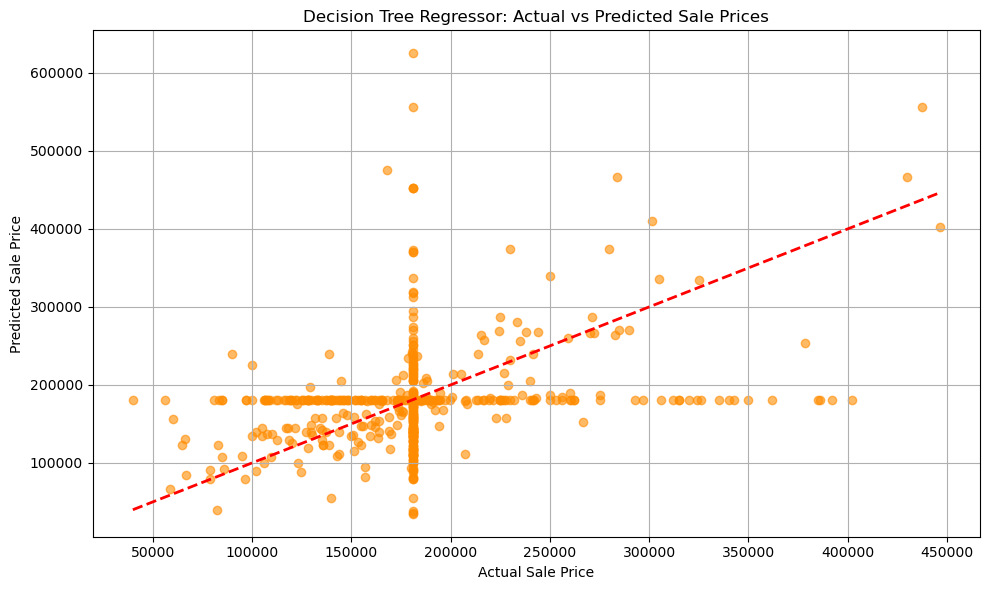

In [22]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, Y_train)
Y_pred_log_dt = model_dt.predict(X_valid)

Y_valid_actual = np.expm1(Y_valid)
Y_pred_actual = np.expm1(Y_pred_log_dt)

rmse = np.sqrt(mean_squared_error(Y_valid_actual, Y_pred_actual))
mae = mean_absolute_error(Y_valid_actual, Y_pred_actual)
r2 = r2_score(Y_valid_actual, Y_pred_actual)
mape = mean_absolute_percentage_error(Y_valid_actual, Y_pred_actual) * 100

print("Decision Tree Evaluation Metrics (Log-Transformed):")
print(f" RMSE : {rmse:.2f}")
print(f" MAE  : {mae:.2f}")
print(f" R²   : {r2:.4f}")
print(f" MAPE : {mape:.2f}%")


# 📈 Visualize Actual vs Predicted Sale Prices
plt.figure(figsize=(10,6))
plt.scatter(Y_valid_actual, Y_pred_actual, alpha=0.6, color='darkorange')
plt.plot([Y_valid_actual.min(), Y_valid_actual.max()],
         [Y_valid_actual.min(), Y_valid_actual.max()],
         'r--', lw=2)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Decision Tree Regressor: Actual vs Predicted Sale Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


Random Forest (with GridSearchCV)

Random Forest Evaluation Metrics (Log-Transformed):
Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
 RMSE : 41303.69
 MAE  : 29798.72
 R²   : 0.3691
 MAPE : 17.66%


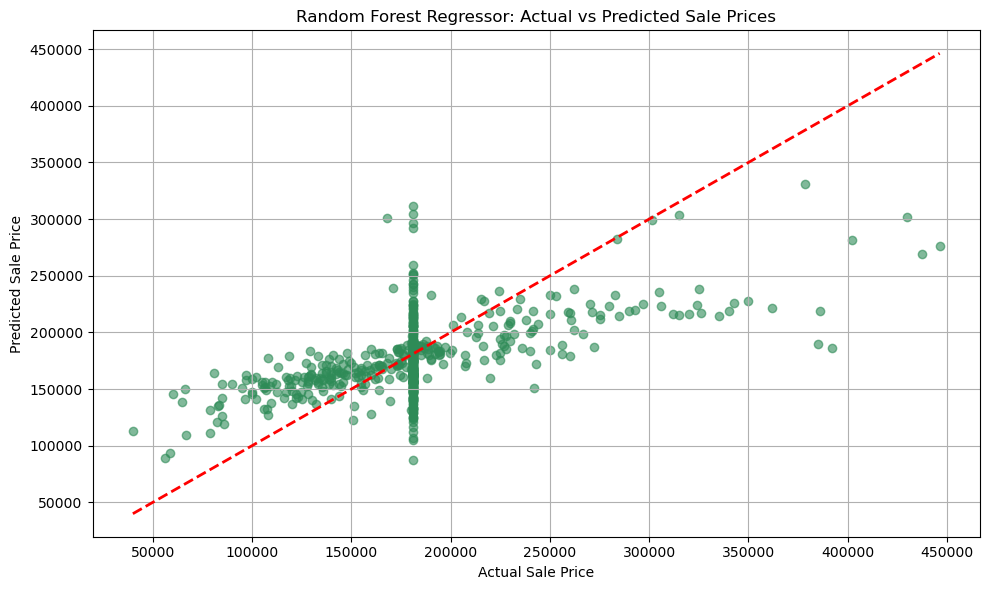

In [23]:
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error'
)
grid_rf.fit(X_train, Y_train)

Y_pred_log_rf = grid_rf.predict(X_valid)
Y_valid_actual = np.expm1(Y_valid)
Y_pred_actual = np.expm1(Y_pred_log_rf)

rmse = np.sqrt(mean_squared_error(Y_valid_actual, Y_pred_actual))
mae = mean_absolute_error(Y_valid_actual, Y_pred_actual)
r2 = r2_score(Y_valid_actual, Y_pred_actual)
mape = mean_absolute_percentage_error(Y_valid_actual, Y_pred_actual) * 100

print("Random Forest Evaluation Metrics (Log-Transformed):")
print(f"Best Params: {grid_rf.best_params_}")
print(f" RMSE : {rmse:.2f}")
print(f" MAE  : {mae:.2f}")
print(f" R²   : {r2:.4f}")
print(f" MAPE : {mape:.2f}%")

# 📈 Visualize Actual vs Predicted Sale Prices
plt.figure(figsize=(10,6))
plt.scatter(Y_valid_actual, Y_pred_actual, alpha=0.6, color='seagreen')
plt.plot([Y_valid_actual.min(), Y_valid_actual.max()],
         [Y_valid_actual.min(), Y_valid_actual.max()],
         'r--', lw=2)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Random Forest Regressor: Actual vs Predicted Sale Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


XGBoost (with GridSearchCV)

XGBoost Evaluation Metrics (Log-Transformed):
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
 RMSE : 40726.87
 MAE  : 29746.00
 R²   : 0.3866
 MAPE : 17.72%


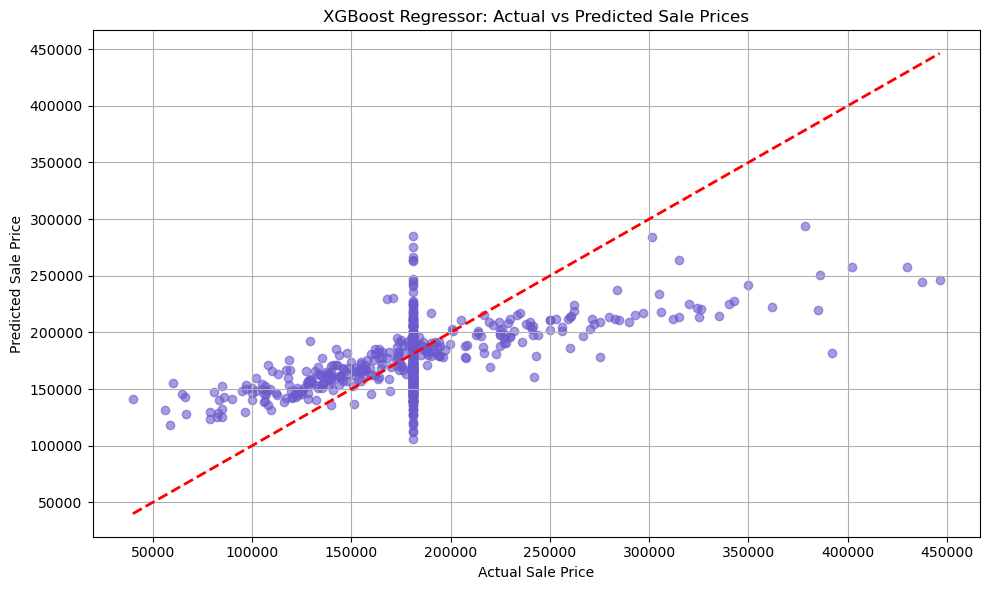

In [24]:
from xgboost import XGBRegressor

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

grid_xgb = GridSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid_xgb,
    cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error'
)
grid_xgb.fit(X_train, Y_train)

Y_pred_log_xgb = grid_xgb.predict(X_valid)
Y_valid_actual = np.expm1(Y_valid)
Y_pred_actual = np.expm1(Y_pred_log_xgb)

rmse = np.sqrt(mean_squared_error(Y_valid_actual, Y_pred_actual))
mae = mean_absolute_error(Y_valid_actual, Y_pred_actual)
r2 = r2_score(Y_valid_actual, Y_pred_actual)
mape = mean_absolute_percentage_error(Y_valid_actual, Y_pred_actual) * 100

print("XGBoost Evaluation Metrics (Log-Transformed):")
print(f"Best Params: {grid_xgb.best_params_}")
print(f" RMSE : {rmse:.2f}")
print(f" MAE  : {mae:.2f}")
print(f" R²   : {r2:.4f}")
print(f" MAPE : {mape:.2f}%")

# 📈 Visualize Actual vs Predicted Sale Prices
plt.figure(figsize=(10,6))
plt.scatter(Y_valid_actual, Y_pred_actual, alpha=0.6, color='slateblue')
plt.plot([Y_valid_actual.min(), Y_valid_actual.max()],
         [Y_valid_actual.min(), Y_valid_actual.max()],
         'r--', lw=2)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("XGBoost Regressor: Actual vs Predicted Sale Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


Support Vector Regressor (with Scaling)

SVR Evaluation Metrics (Log-Transformed + Scaled):
 RMSE : 53008.38
 MAE  : 35977.08
 R²   : -0.0391
 MAPE : 21.67%


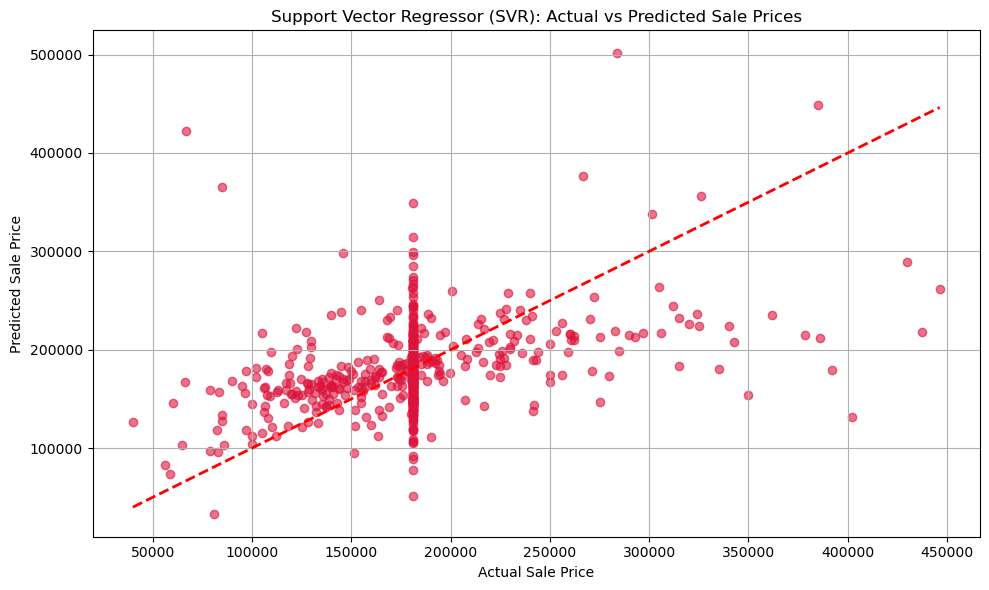

In [26]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

svr_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf', C=100, epsilon=0.1))
])

svr_model.fit(X_train, Y_train)
Y_pred_log_svr = svr_model.predict(X_valid)

Y_valid_actual = np.expm1(Y_valid)
Y_pred_actual = np.expm1(Y_pred_log_svr)

rmse = np.sqrt(mean_squared_error(Y_valid_actual, Y_pred_actual))
mae = mean_absolute_error(Y_valid_actual, Y_pred_actual)
r2 = r2_score(Y_valid_actual, Y_pred_actual)
mape = mean_absolute_percentage_error(Y_valid_actual, Y_pred_actual) * 100

print("SVR Evaluation Metrics (Log-Transformed + Scaled):")
print(f" RMSE : {rmse:.2f}")
print(f" MAE  : {mae:.2f}")
print(f" R²   : {r2:.4f}")
print(f" MAPE : {mape:.2f}%")

# 📈 Visualize Actual vs Predicted Sale Prices
plt.figure(figsize=(10,6))
plt.scatter(Y_valid_actual, Y_pred_actual, alpha=0.6, color='crimson')
plt.plot([Y_valid_actual.min(), Y_valid_actual.max()],
         [Y_valid_actual.min(), Y_valid_actual.max()],
         'r--', lw=2)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Support Vector Regressor (SVR): Actual vs Predicted Sale Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Define a helper function
def evaluate_model(model, X_valid, Y_valid, name):
    Y_pred_log = model.predict(X_valid)
    Y_pred_actual = np.expm1(Y_pred_log)
    Y_valid_actual = np.expm1(Y_valid)

    rmse = np.sqrt(mean_squared_error(Y_valid_actual, Y_pred_actual))
    mae = mean_absolute_error(Y_valid_actual, Y_pred_actual)
    r2 = r2_score(Y_valid_actual, Y_pred_actual)
    mape = mean_absolute_percentage_error(Y_valid_actual, Y_pred_actual) * 100

    return {
        "Model": name,
        "RMSE": round(rmse, 2),
        "MAE": round(mae, 2),
        "R²": round(r2, 4),
        "MAPE (%)": round(mape, 2)
    }

# Run evaluation for all models
results = []
results.append(evaluate_model(model_LR, X_valid, Y_valid, "Linear Regression"))
results.append(evaluate_model(model_lasso, X_valid, Y_valid, "Lasso Regression"))
results.append(evaluate_model(model_dt, X_valid, Y_valid, "Decision Tree"))
results.append(evaluate_model(grid_rf, X_valid, Y_valid, "Random Forest"))
results.append(evaluate_model(grid_xgb, X_valid, Y_valid, "XGBoost"))
results.append(evaluate_model(svr_model, X_valid, Y_valid, "SVR"))

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


               Model      RMSE       MAE      R²  MAPE (%)
0  Linear Regression  41103.61  29948.47  0.3752     17.72
1   Lasso Regression  41134.76  29876.59  0.3743     17.70
2      Decision Tree  64967.98  40611.86 -0.5609     24.06
3      Random Forest  41303.69  29798.72  0.3691     17.66
4            XGBoost  40726.87  29746.00  0.3866     17.72
5                SVR  53008.38  35977.08 -0.0391     21.67


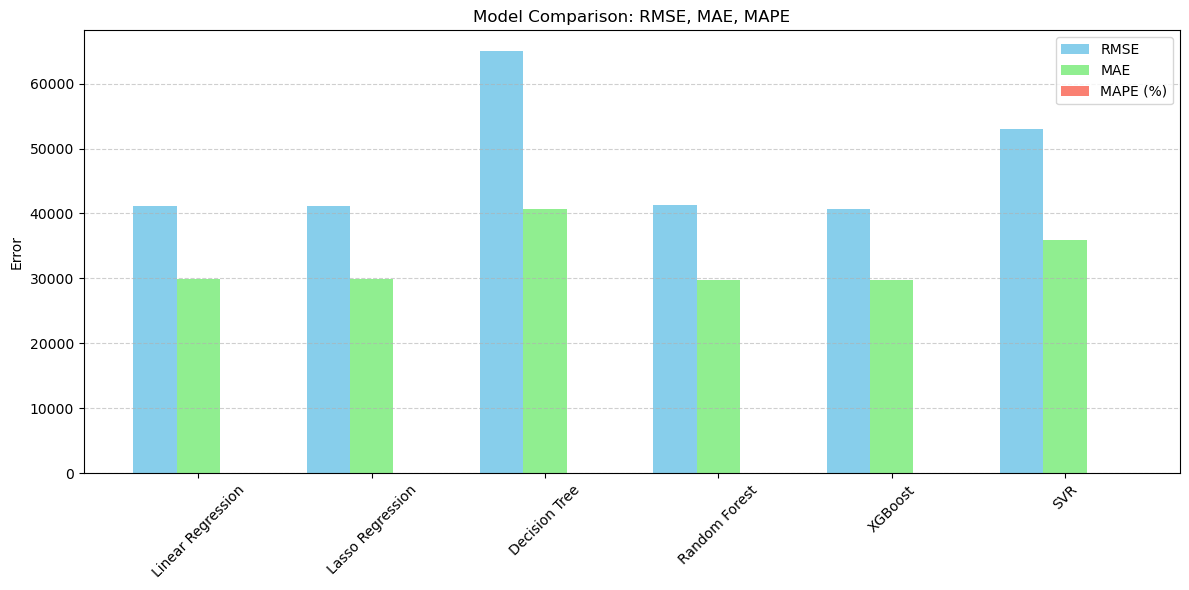

In [28]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12,6))
bar_width = 0.25
x = np.arange(len(results_df["Model"]))

plt.bar(x, results_df["RMSE"], width=bar_width, label="RMSE", color='skyblue')
plt.bar(x + bar_width, results_df["MAE"], width=bar_width, label="MAE", color='lightgreen')
plt.bar(x + 2*bar_width, results_df["MAPE (%)"], width=bar_width, label="MAPE (%)", color='salmon')

plt.xticks(x + bar_width, results_df["Model"], rotation=45)
plt.title("Model Comparison: RMSE, MAE, MAPE")
plt.ylabel("Error")
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()


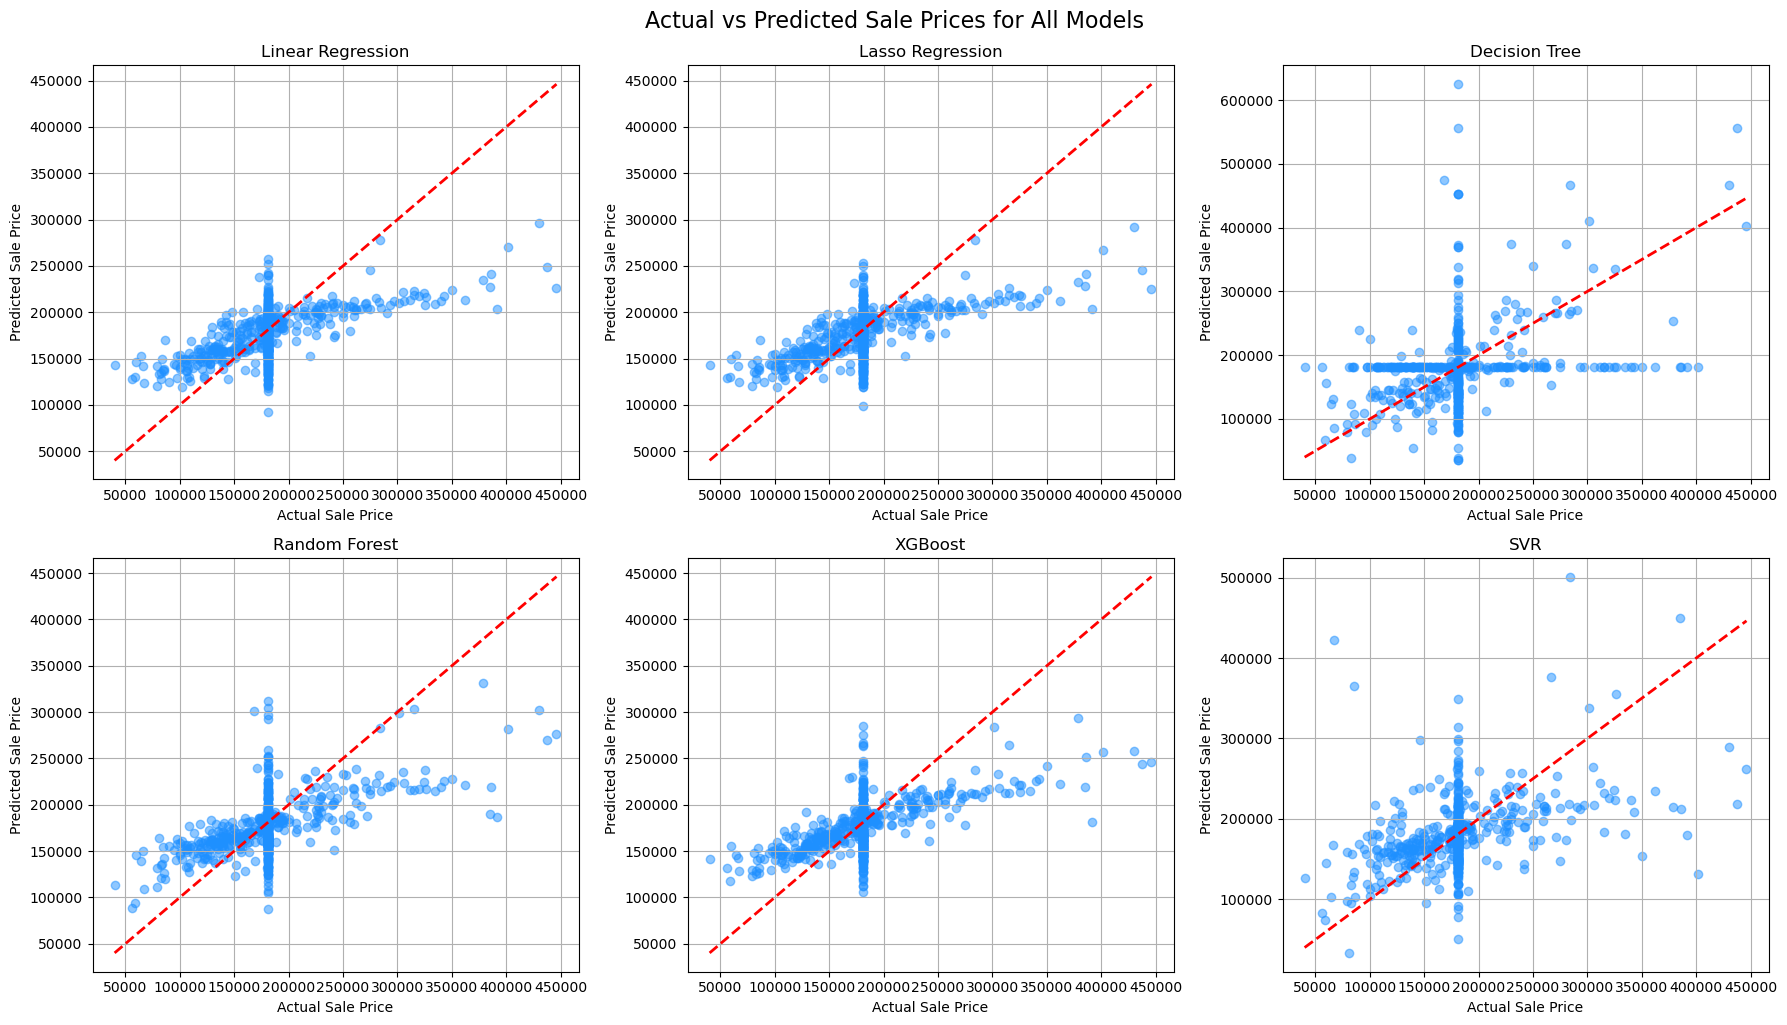

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

model_list = [
    ("Linear Regression", model_LR),
    ("Lasso Regression", model_lasso),
    ("Decision Tree", model_dt),
    ("Random Forest", grid_rf),
    ("XGBoost", grid_xgb),
    ("SVR", svr_model)
]

# Plot each model's predictions
for i, (title, model) in enumerate(model_list):
    Y_pred_log = model.predict(X_valid)
    Y_pred_actual = np.expm1(Y_pred_log)
    Y_valid_actual = np.expm1(Y_valid)

    axes[i].scatter(Y_valid_actual, Y_pred_actual, alpha=0.5, color='dodgerblue')
    axes[i].plot([Y_valid_actual.min(), Y_valid_actual.max()],
                 [Y_valid_actual.min(), Y_valid_actual.max()],
                 'r--', linewidth=2)
    axes[i].set_title(f"{title}", fontsize=12)
    axes[i].set_xlabel("Actual Sale Price")
    axes[i].set_ylabel("Predicted Sale Price")
    axes[i].grid(True)

plt.tight_layout()
plt.suptitle("Actual vs Predicted Sale Prices for All Models", fontsize=16, y=1.02)
plt.show()


In [30]:
import numpy as np
import pandas as pd

# Predict using XGBoost (log-transformed model)
Y_pred_log = grid_xgb.predict(X_valid)

# Convert back from log-scale
Y_pred_actual = np.expm1(Y_pred_log)
Y_valid_actual = np.expm1(Y_valid)

# Combine into a DataFrame
xgb_pred_df = pd.DataFrame({
    "Actual SalePrice": Y_valid_actual,
    "Predicted SalePrice (XGBoost)": Y_pred_actual
})

# Display first 10 predictions
print(xgb_pred_df.head(10))

# Optional: Save to CSV
xgb_pred_df.to_csv("xgboost_predicted_prices.csv", index=False)


      Actual SalePrice  Predicted SalePrice (XGBoost)
1728      180921.19589                  190541.203125
2689      180921.19589                  284826.500000
1151      149900.00000                  174197.421875
2762      180921.19589                  170123.812500
1180      250000.00000                  210911.203125
2223      180921.19589                  195161.203125
553       108000.00000                  135686.859375
104       169500.00000                  148129.718750
1190      168000.00000                  177811.312500
2308      180921.19589                  204819.625000
